In [ ]:
import numpy as np
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/data/datathondata/'
df = pd.read_csv(f'{DATA_PATH}dataset_0110.csv')
train = pd.read_csv(f'{DATA_PATH}train_fin2.csv')
test = pd.read_csv(f'{DATA_PATH}test_fin2.csv')

df.shape, train.shape, test.shape

<ipython-input-9-a3e3768feb62>:5: DtypeWarning: Columns (37,103,109,207) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{DATA_PATH}dataset_0110.csv')


((55989, 258), (44791, 195), (11198, 195))

In [ ]:
df['year'].value_counts()

,count
year,
2019.0,6134
2018.0,6022
2017.0,5928
2016.0,5887
2020.0,5725
2023.0,5664
2021.0,5468
2015.0,5212
2022.0,5082


In [ ]:
df.head()

,id,id_fam,year,region,town_t,apt_t,sex,age,incm,ho_incm,...,di2_pt,di2_2,de1_pt,de1_31,de1_32,de1_33,고혈압,당뇨,이상지질혈증,신장질환
0,A651172801,A6511728,2016.0,1.0,1.0,2.0,1.0,61.0,3.0,3.0,...,8.0,8.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,A651172802,A6511728,2016.0,1.0,1.0,2.0,2.0,57.0,3.0,3.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0
2,A651183001,A6511830,2016.0,1.0,1.0,2.0,2.0,41.0,3.0,3.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0
3,A651183002,A6511830,2016.0,1.0,1.0,2.0,1.0,39.0,3.0,3.0,...,8.0,8.0,8.0,8.0,8.0,8.0,1.0,0.0,1.0,0.0
4,A651183003,A6511830,2016.0,1.0,1.0,2.0,2.0,38.0,3.0,3.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0


In [ ]:
train.head()

,시도,동읍,아파트구분,성별,나이,소득4분위,가구소득4분위,소득5분위,가구소득5분위,교육수준_재분류,...,천식진단시기,천식약복용,아토피의사진단여부,아토피진단시기,비염의사진단여부,비염진단시기,고혈압,당뇨,이상지질혈증,신장질환
0,1.0,1.0,2.0,1.0,61.0,3.0,3.0,4.0,4.0,4.0,...,888.0,0.0,0.0,888.0,1.0,51.0,1.0,1.0,0.0,0.0
1,1.0,1.0,2.0,2.0,57.0,3.0,3.0,4.0,4.0,4.0,...,888.0,0.0,0.0,888.0,0.0,888.0,0.0,0.0,0.0,0.0
2,1.0,1.0,2.0,2.0,41.0,3.0,3.0,3.0,4.0,4.0,...,888.0,0.0,0.0,888.0,0.0,888.0,0.0,0.0,0.0,0.0
3,1.0,1.0,2.0,1.0,39.0,3.0,3.0,4.0,4.0,4.0,...,888.0,0.0,0.0,888.0,1.0,11.0,1.0,0.0,1.0,0.0
4,1.0,1.0,2.0,2.0,38.0,3.0,3.0,4.0,4.0,4.0,...,888.0,0.0,0.0,888.0,1.0,3.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정리

## 범주별

In [ ]:
"""
원본데이터(df) : 질병관리청의 2016 ~ 2023년 8개년도 국민건강영양조사 원시데이터

train set 및 test set : 총 55,989 건의 원본데이터를 MultilabelStratifiedKFold 를 이용하여 각 target label(고혈압, 당뇨, 이상지질혈증)의 비율을 유지하며 train 8 : test 2 의 비율로 분할
  train set : 44,791 건의 국민건강영양조사 데이터
  test set : 11,198 건의 국민건강영양조사 데이터
"""

'\n원본데이터(df) : 질병관리청의 2016 ~ 2023년 8개년도 국민건강영양조사 원시데이터\n\ntrain set 및 test set : 총 55,989 건의 원본데이터를 MultilabelStratifiedKFold 를 이용하여 각 target label(고혈압, 당뇨, 이상지질혈증)의 비율을 유지하며 train 8 : test 2 의 비율로 분할\n  train set : 44,791 건의 국민건강영양조사 데이터\n  test set : 11,198 건의 국민건강영양조사 데이터\n'

In [ ]:
'''
1. 개인 특성
  - 성별, 나이, 키, 몸무게, 허리둘레, 체질량지수, 비만여부
1-1. 개인 특성(여성)
  - 월경여부, 초경연령, 임신경험여부, 임신횟수, 출산경험, 첫출산연령, 마지막출산연령,
   모유수유경험, 모유수유자녀수, 모유수유기간_월, 경구피임약복용여부, 생리여부, 임신여부, 임신개월수
2. 가족력
  - 만성질환_가족력여부, 부_고혈압여부, 모_고혈압여부, 형제자매_고혈압여부, 부_고지혈증여부, 모_고지혈증여부, 형제자매_고지혈증여부,
   부_허혈성심장질환여부, 모_허혈성심장질환여부, 형제자매_허혈성심장질환여부, 부_뇌졸중여부, 모_뇌졸중여부, 형제자매_뇌졸중여부,
   부_당뇨여부, 모_당뇨여부, 형제자매_당뇨여부
3. 거주지
  - 지역(시/도)
4. 흡연 및 음주
  - 음주경험, 음주시작연령, 1년간음주빈도, 회당음주량_범주, 폭음빈도
  - 흡연경험, 흡연시작연령, 현재흡연, 일평균흡연량, 1달간흡연일수
'''


'\n1. 개인 특성\n  - 성별, 나이, 키, 몸무게, 허리둘레, 체질량지수, 비만여부\n1-1. 개인 특성(여성)\n  - 월경여부, 초경연령, 임신경험여부, 임신횟수, 출산경험, 첫출산연령, 마지막출산연령,\n   모유수유경험, 모유수유자녀수, 모유수유기간_월, 경구피임약복용여부, 생리여부, 임신여부, 임신개월수\n2. 가족력\n  - 만성질환_가족력여부, 부_고혈압여부, 모_고혈압여부, 형제자매_고혈압여부, 부_고지혈증여부, 모_고지혈증여부, 형제자매_고지혈증여부,\n   부_허혈성심장질환여부, 모_허혈성심장질환여부, 형제자매_허혈성심장질환여부, 부_뇌졸중여부, 모_뇌졸중여부, 형제자매_뇌졸중여부,\n   부_당뇨여부, 모_당뇨여부, 형제자매_당뇨여부\n3. 거주지\n  - 지역(시/도)\n4. 흡연 및 음주\n  - 음주경험, 음주시작연령, 1년간음주빈도, 회당음주량_범주, 폭음빈도\n  - 흡연경험, 흡연시작연령, 현재흡연, 일평균흡연량, 1달간흡연일수\n'

In [ ]:
# from IPython.display import display, Markdown

# # 개인 특성: 성별, 나이, 키, 몸무게, 허리둘레, 체질량지수, 비만여부
# 개인특성 = ['성별', '나이', '키', '몸무게', '허리둘레', '체질량지수', '비만']
# 개인특성_df = train[개인특성].describe()

# # 개인 특성(여성)
# 여성_개인특성 = ['월경여부', '초경연령', '임신경험여부', '임신횟수', '출산경험', '첫출산연령', '마지막출산연령',
#    '모유수유경험', '모유수유자녀수', '모유수유기간_월', '경구피임약복용여부', '생리여부', '임신여부', '임신개월수']
# 여성_개인특성_df = train[여성_개인특성].describe()

# # 가족력: 각 가족력 항목들
# 가족력 = ['만성질환_가족력', '부_고혈압', '모_고혈압', '형제자매_고혈압',
#           '부_고지혈증', '모_고지혈증', '형제자매_고지혈증여부',
#           '부_허혈성심장질환', '모_허혈성심장질환', '형제자매_허혈성심장질환',
#           '부_뇌졸중', '모_뇌졸중', '형제자매_뇌졸중', '부_당뇨여부', '모_당뇨여부', '형제자매_당뇨']
# 가족력_df = train[가족력].describe()

# # 거주지: 지역(시/도)
# 거주지 = ['시도', '동읍']
# 거주지_df = train[거주지].describe()

# # 흡연 및 음주: 음주와 흡연 관련 항목들
# 흡연_음주 = ['음주경험', '음주시작연령', '1년간음주빈도', '회당음주량_범주', '폭음빈도',
#             '흡연경험', '흡연시작연령', '현재흡연', '일평균흡연량', '1달간흡연일수']
# 흡연_음주_df = train[흡연_음주].describe()

# display(Markdown("### 1. 개인 특성"))
# display(개인특성_df)

# display(Markdown("### 1-1. 개인 특성(여성)"))
# display(여성_개인특성_df)

# display(Markdown("### 2. 가족력"))
# display(가족력_df)

# display(Markdown("### 3. 거주지"))
# display(거주지_df)

# display(Markdown("### 4. 흡연 및 음주"))
# display(흡연_음주_df)

## 피처중요도별

In [ ]:
# top_cols = train[['나이', '키', '몸무게', '허리둘레', '체질량지수', '식이섬유섭취량', '나트륨섭취량', '지방섭취량', '당섭취량', '콜레스테롤섭취량', '탄수화물섭취량', '가구총소득']]
# top_cols.describe()

# 시각화

## 전체 유병자 비율

In [ ]:
# 전체고혈압 = df['고혈압'].mean()

# 전체당뇨 = df['당뇨'].mean()

# 전체이상지질 = df['이상지질혈증'].mean()

## 연도별 질환별 유병자수 추이

### 개별 라인

In [ ]:
# df['year'] = df['year'].astype(int)

# 연도별고혈압 = df.groupby('year')['고혈압'].sum()

# plt.figure(figsize=(8,5))
# 연도별고혈압.plot(kind='line', color='red', marker = "x")
# plt.title('연도별 고혈압 환자')
# plt.xlabel('연도')
# plt.ylabel('고혈압 환자수')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# 연도별당뇨 = df.groupby('year')['당뇨'].sum()

# plt.figure(figsize=(8,5))
# 연도별당뇨.plot(kind='line', color='yellow', marker = "o")
# plt.title('연도별 당뇨 환자')
# plt.xlabel('연도')
# plt.ylabel('당뇨 환자수')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# 연도별이상지질 = df.groupby('year')['이상지질혈증'].sum()

# plt.figure(figsize=(8,5))
# 연도별이상지질.plot(kind='line', color='green', marker = "v")
# plt.title('연도별 이상지질혈증 환자')
# plt.xlabel('연도')
# plt.ylabel('이상지질혈증 환자수')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

### 합쳐서 막대

In [ ]:
# # 막대 그래프를 겹쳐서 표시
# plt.figure(figsize=(10, 6))

# bar_width = 0.25  # 막대 너비 설정
# index = range(len(연도별고혈압))  # 연도의 인덱스 생성

# # 각 데이터셋을 막대 그래프 형식으로 그리기
# plt.bar(index, 연도별고혈압, bar_width, label='고혈압', color='red')
# plt.bar([i + bar_width for i in index], 연도별당뇨, bar_width, label='당뇨', color='yellow')
# plt.bar([i + 2 * bar_width for i in index], 연도별이상지질, bar_width, label='이상지질혈증', color='green')

# # 그래프 타이틀 및 레이블 설정
# plt.title('연도별 고혈압, 당뇨, 이상지질혈증 환자')
# plt.xlabel('연도')
# plt.ylabel('환자 수')

# # x축 레이블 설정 (연도)
# plt.xticks([i + bar_width for i in index], 연도별고혈압.index, rotation=45)

# # 범례 표시
# plt.legend()

# plt.tight_layout()
# plt.show()

### 합쳐서 라인

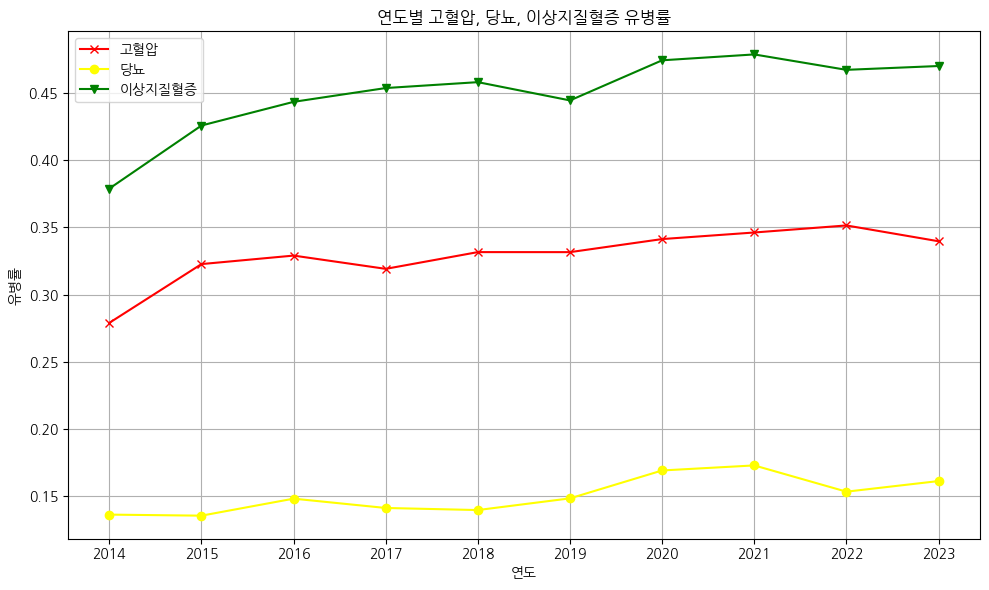

In [ ]:
# 라인 차트 그리기
plt.figure(figsize=(10, 6))

연도별고혈압 = df.groupby('year')['고혈압'].mean()
연도별당뇨 = df.groupby('year')['당뇨'].mean()
연도별이상지질 = df.groupby('year')['이상지질혈증'].mean()

# 각 데이터를 다른 라인으로 그리기
plt.plot(연도별고혈압.index, 연도별고혈압, marker='x', color='red', label='고혈압')
plt.plot(연도별당뇨.index, 연도별당뇨, marker='o', color='yellow', label='당뇨')
plt.plot(연도별이상지질.index, 연도별이상지질, marker='v', color='green', label='이상지질혈증')

# 그래프 타이틀 및 레이블 설정
plt.title('연도별 고혈압, 당뇨, 이상지질혈증 유병률')
plt.xlabel('연도')
plt.ylabel('유병률')

# x축 레이블 설정
plt.xticks(연도별고혈압.index, rotation=0)
plt.grid()

# 범례 표시
plt.legend()

plt.tight_layout()
plt.show()

## 지역별 질환별 유병자수 추이 (실제 지역으로 라벨링 필요, 지역별 환자 비율로)

### 개별

In [ ]:
# df['region'] = df['region'].astype(int)

# 지역별고혈압 = df.groupby('region')['고혈압'].mean()

# plt.figure(figsize=(8,5))
# 지역별고혈압.plot(kind='line', color='red', marker = "x")
# plt.title('지역별 고혈압 환자')
# plt.xlabel('지역')
# plt.ylabel('고혈압 환자수')
# plt.xticks(ticks=range(len(지역별고혈압)), labels=지역별고혈압.index)
# plt.tight_layout()
# plt.show()

# 지역별당뇨 = df.groupby('region')['당뇨'].mean()

# plt.figure(figsize=(8,5))
# 지역별당뇨.plot(kind='line', color='yellow', marker = "o")
# plt.title('지역별 당뇨 환자')
# plt.xlabel('지역')
# plt.ylabel('당뇨 환자수')
# plt.xticks(ticks=range(len(지역별당뇨)), labels=지역별당뇨.index)
# plt.tight_layout()
# plt.show()

# 지역별이상지질 = df.groupby('region')['이상지질혈증'].mean()

# plt.figure(figsize=(8,5))
# 지역별이상지질.plot(kind='line', color='green', marker = "v")
# plt.title('지역별 이상지질혈증 환자')
# plt.xlabel('지역')
# plt.ylabel('이상지질혈증 환자수')
# plt.xticks(ticks=range(len(지역별이상지질)), labels=지역별이상지질.index)
# plt.tight_layout()
# plt.show()

### 합쳐서

In [ ]:
# # 막대 그래프를 겹쳐서 표시
# plt.figure(figsize=(10, 6))

# bar_width = 0.25  # 막대 너비 설정
# index = range(len(지역별고혈압))  # 지역의 인덱스 생성

# # 각 데이터셋을 막대 그래프 형식으로 그리기
# plt.bar(index, 지역별고혈압, bar_width, label='고혈압', color='red')
# plt.bar([i + bar_width for i in index], 지역별당뇨, bar_width, label='당뇨', color='yellow')
# plt.bar([i + 2 * bar_width for i in index], 지역별이상지질, bar_width, label='이상지질혈증', color='green')

# # 그래프 타이틀 및 레이블 설정
# plt.title('지역별 고혈압, 당뇨, 이상지질혈증 환자')
# plt.xlabel('지역')
# plt.ylabel('환자 수')

# # x축 레이블 설정 (지역)
# plt.xticks([i + bar_width for i in index], 지역별고혈압.index)

# # 범례 표시
# plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:
region_mapping = {
    1: '서울', 2: '부산', 3: '대구', 4: '인천', 5: '광주', 6: '대전',
    7: '울산', 8: '세종', 9: '경기', 10: '강원', 11: '충북', 12: '충남',
    13: '전북', 14: '전남', 15: '경북', 16: '경남', 17: '제주'
}

df['region'] = df['region'].replace(region_mapping)
df['region']

,region
0,서울
1,서울
2,서울
3,서울
4,서울
...,...
55984,경남
55985,경남
55986,경남
55987,경남


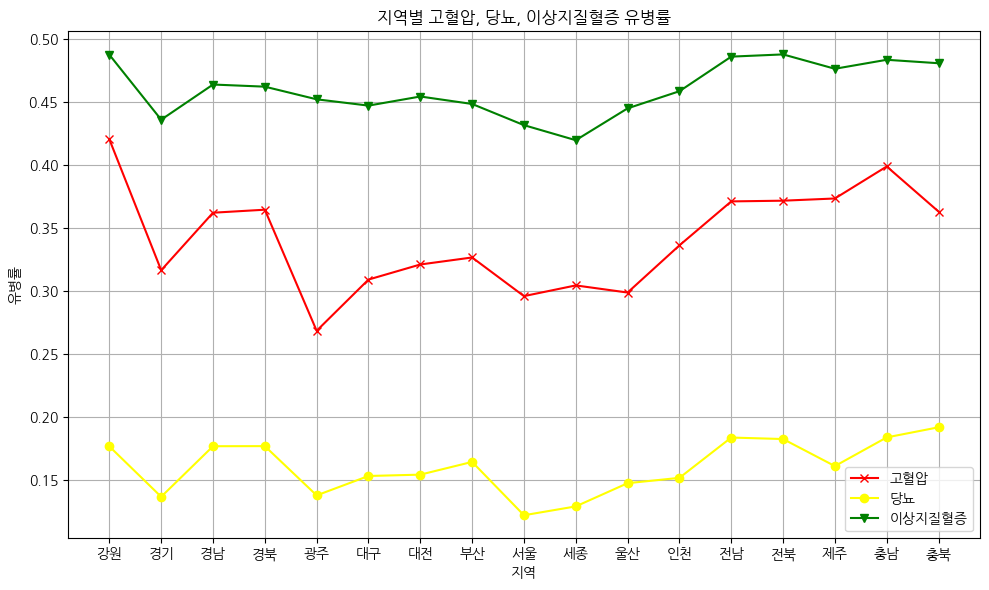

In [ ]:
# 라인 차트 그리기
plt.figure(figsize=(10, 6))

지역별고혈압 = df.groupby('region')['고혈압'].mean()
지역별당뇨 = df.groupby('region')['당뇨'].mean()
지역별이상지질 = df.groupby('region')['이상지질혈증'].mean()

# 각 데이터를 다른 라인으로 그리기
plt.plot(지역별고혈압.index, 지역별고혈압, marker='x', color='red', label='고혈압')
plt.plot(지역별당뇨.index, 지역별당뇨, marker='o', color='yellow', label='당뇨')
plt.plot(지역별이상지질.index, 지역별이상지질, marker='v', color='green', label='이상지질혈증')

# 그래프 타이틀 및 레이블 설정
plt.title('지역별 고혈압, 당뇨, 이상지질혈증 유병률')
plt.xlabel('지역')
plt.ylabel('유병률')

# x축 레이블 설정
plt.xticks(ticks=range(len(지역별고혈압)), labels=지역별고혈압.index)
plt.grid()

# 범례 표시
plt.legend()

plt.tight_layout()
plt.show()

## 성별 ~

In [ ]:
# # 성별별 각 질병의 유병률 계산
# 고혈압_성별 = df.groupby('sex')['고혈압'].mean()
# 당뇨_성별 = df.groupby('sex')['당뇨'].mean()
# 이상지질혈증_성별 = df.groupby('sex')['이상지질혈증'].mean()

# # 성별별로 각각 파이차트를 그리기
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# # 고혈압 파이차트
# axes[0].pie(고혈압_성별, labels=고혈압_성별.index, autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=90)
# axes[0].set_title('성별별 고혈압 유병률')

# # 당뇨 파이차트
# axes[1].pie(당뇨_성별, labels=당뇨_성별.index, autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=90)
# axes[1].set_title('성별별 당뇨 유병률')

# # 이상지질혈증 파이차트
# axes[2].pie(이상지질혈증_성별, labels=이상지질혈증_성별.index, autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=90)
# axes[2].set_title('성별별 이상지질혈증 유병률')

# # 레이아웃 조정
# plt.tight_layout()
# plt.show()

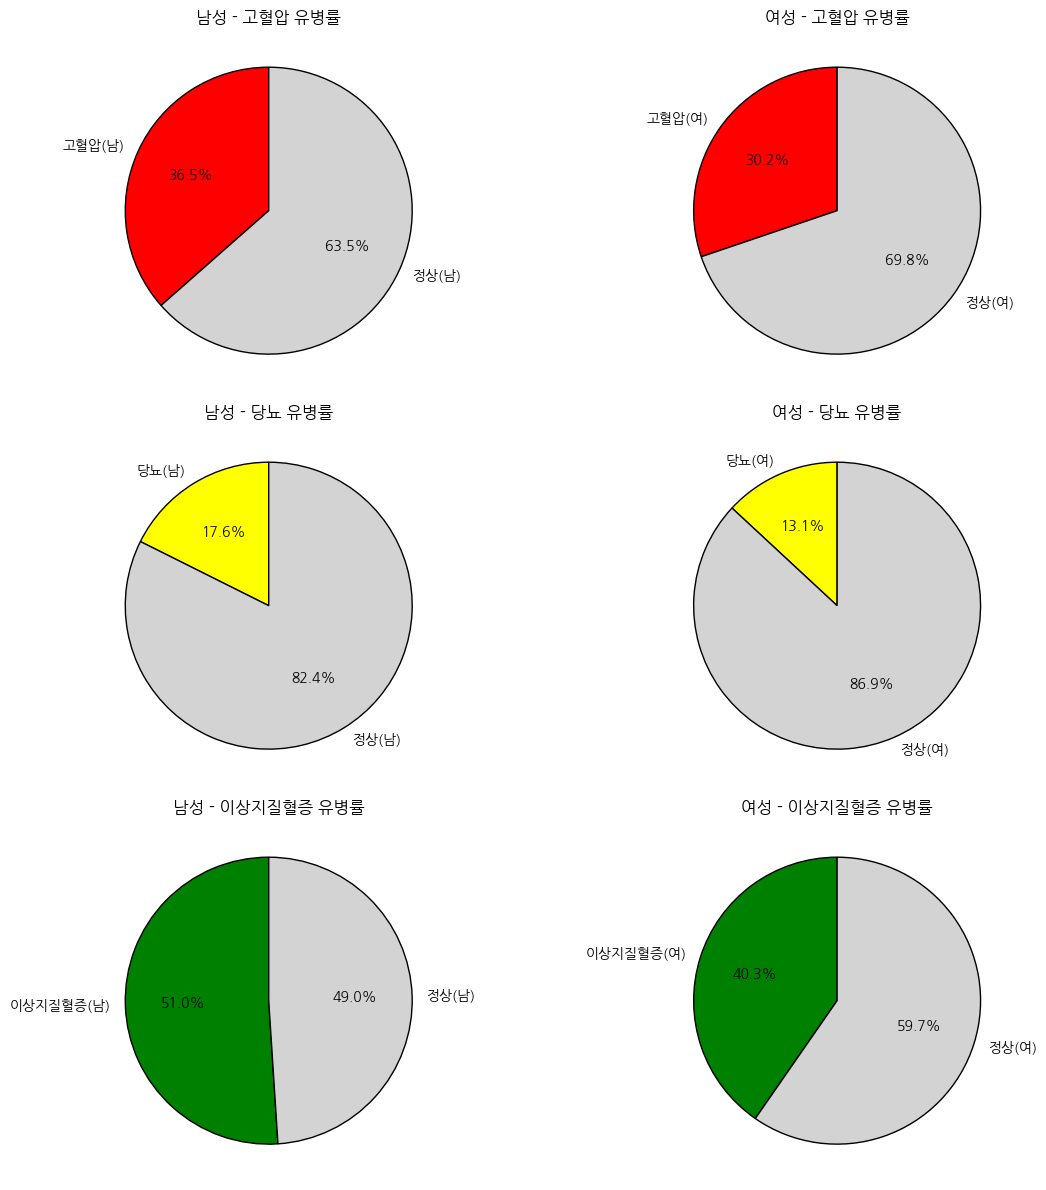

In [ ]:
# 남성과 여성 데이터 분리
남성_df = df[df['sex'] == 1]
여성_df = df[df['sex'] == 2]

# 남성 및 여성별 각 질병의 유병률 계산
고혈압_남성 = 남성_df['고혈압'].mean()
당뇨_남성 = 남성_df['당뇨'].mean()
이상지질혈증_남성 = 남성_df['이상지질혈증'].mean()

고혈압_여성 = 여성_df['고혈압'].mean()
당뇨_여성 = 여성_df['당뇨'].mean()
이상지질혈증_여성 = 여성_df['이상지질혈증'].mean()

# 차트 그리기
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# 남성 - 고혈압 유병률 파이차트
axes[0, 0].pie([고혈압_남성, 1 - 고혈압_남성], labels=['고혈압(남)', '정상(남)'], autopct='%1.1f%%', startangle=90, colors=['red', 'lightgray'], wedgeprops={'edgecolor': 'black'})
axes[0, 0].set_title('남성 - 고혈압 유병률')

# 여성 - 고혈압 유병률 파이차트
axes[0, 1].pie([고혈압_여성, 1 - 고혈압_여성], labels=['고혈압(여)', '정상(여)'], autopct='%1.1f%%', startangle=90, colors=['red', 'lightgray'], wedgeprops={'edgecolor': 'black'})
axes[0, 1].set_title('여성 - 고혈압 유병률')

# 남성 - 당뇨 유병률 파이차트
axes[1, 0].pie([당뇨_남성, 1 - 당뇨_남성], labels=['당뇨(남)', '정상(남)'], autopct='%1.1f%%', startangle=90, colors=['yellow', 'lightgray'], wedgeprops={'edgecolor': 'black'})
axes[1, 0].set_title('남성 - 당뇨 유병률')

# 여성 - 당뇨 유병률 파이차트
axes[1, 1].pie([당뇨_여성, 1 - 당뇨_여성], labels=['당뇨(여)', '정상(여)'], autopct='%1.1f%%', startangle=90, colors=['yellow', 'lightgray'], wedgeprops={'edgecolor': 'black'})
axes[1, 1].set_title('여성 - 당뇨 유병률')

# 남성 - 이상지질혈증 유병률 파이차트
axes[2, 0].pie([이상지질혈증_남성, 1 - 이상지질혈증_남성], labels=['이상지질혈증(남)', '정상(남)'], autopct='%1.1f%%', startangle=90, colors=['green', 'lightgray'], wedgeprops={'edgecolor': 'black'})
axes[2, 0].set_title('남성 - 이상지질혈증 유병률')

# 여성 - 이상지질혈증 유병률 파이차트
axes[2, 1].pie([이상지질혈증_여성, 1 - 이상지질혈증_여성], labels=['이상지질혈증(여)', '정상(여)'], autopct='%1.1f%%', startangle=90, colors=['green', 'lightgray'], wedgeprops={'edgecolor': 'black'})
axes[2, 1].set_title('여성 - 이상지질혈증 유병률')

# 레이아웃 조정
plt.tight_layout()
plt.show()

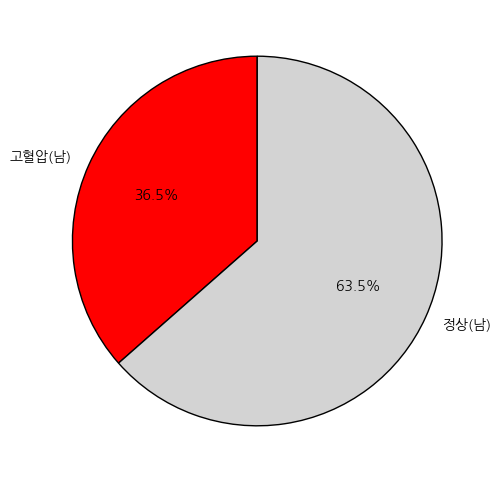

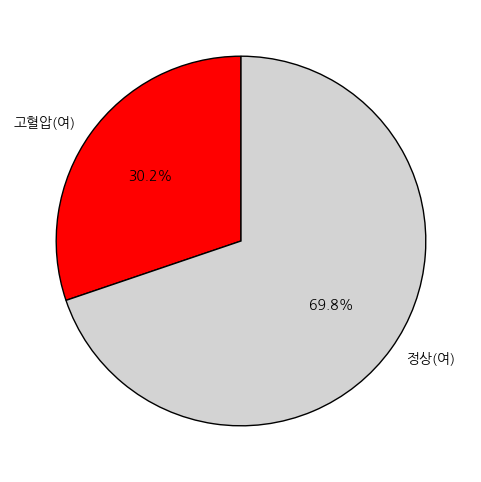

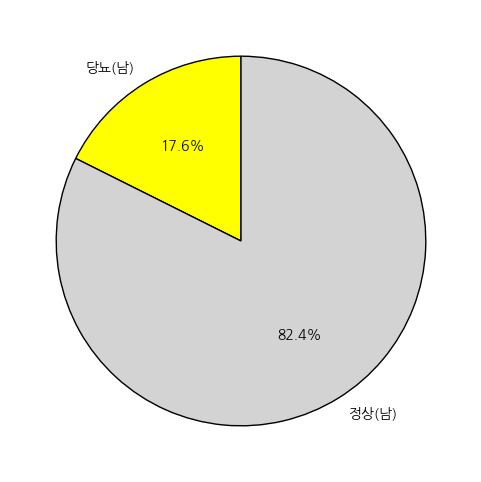

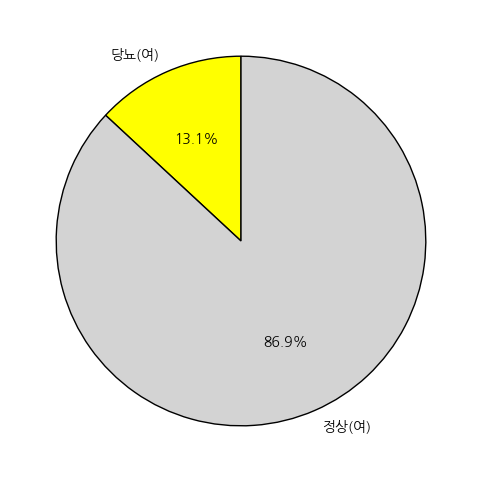

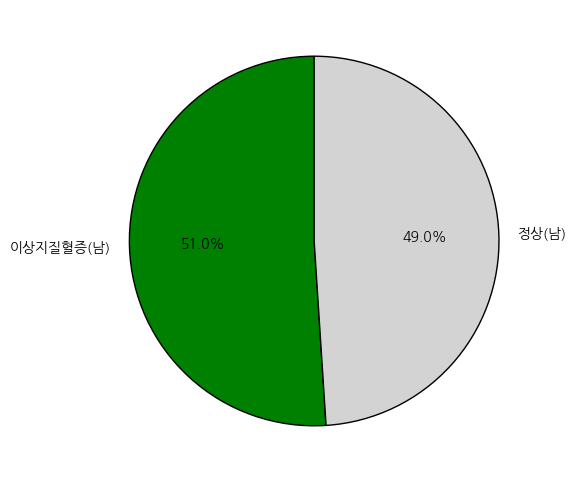

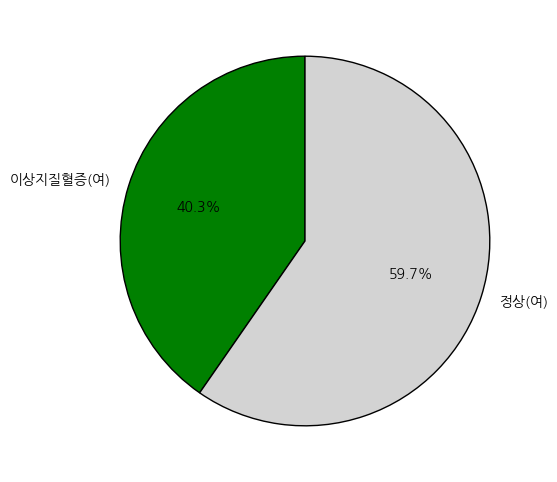

In [ ]:
# 남성 - 고혈압 유병률 파이차트
고혈압_남성 = 남성_df['고혈압'].mean()
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie([고혈압_남성, 1 - 고혈압_남성], labels=['고혈압(남)', '정상(남)'], autopct='%1.1f%%', startangle=90, colors=['red', 'lightgray'], wedgeprops={'edgecolor': 'black'})
# ax1.set_title('남성 - 고혈압 유병률')
plt.show()

# 여성 - 고혈압 유병률 파이차트
고혈압_여성 = 여성_df['고혈압'].mean()
fig2, ax2 = plt.subplots(figsize=(6, 6))
ax2.pie([고혈압_여성, 1 - 고혈압_여성], labels=['고혈압(여)', '정상(여)'], autopct='%1.1f%%', startangle=90, colors=['red', 'lightgray'], wedgeprops={'edgecolor': 'black'})
# ax2.set_title('여성 - 고혈압 유병률')
plt.show()

# 남성 - 당뇨 유병률 파이차트
당뇨_남성 = 남성_df['당뇨'].mean()
fig3, ax3 = plt.subplots(figsize=(6, 6))
ax3.pie([당뇨_남성, 1 - 당뇨_남성], labels=['당뇨(남)', '정상(남)'], autopct='%1.1f%%', startangle=90, colors=['yellow', 'lightgray'], wedgeprops={'edgecolor': 'black'})
# ax3.set_title('남성 - 당뇨 유병률')
plt.show()

# 여성 - 당뇨 유병률 파이차트
당뇨_여성 = 여성_df['당뇨'].mean()
fig4, ax4 = plt.subplots(figsize=(6, 6))
ax4.pie([당뇨_여성, 1 - 당뇨_여성], labels=['당뇨(여)', '정상(여)'], autopct='%1.1f%%', startangle=90, colors=['yellow', 'lightgray'], wedgeprops={'edgecolor': 'black'})
# ax4.set_title('여성 - 당뇨 유병률')
plt.show()

# 남성 - 이상지질혈증 유병률 파이차트
이상지질혈증_남성 = 남성_df['이상지질혈증'].mean()
fig5, ax5 = plt.subplots(figsize=(6, 6))
ax5.pie([이상지질혈증_남성, 1 - 이상지질혈증_남성], labels=['이상지질혈증(남)', '정상(남)'], autopct='%1.1f%%', startangle=90, colors=['green', 'lightgray'], wedgeprops={'edgecolor': 'black'})
# ax5.set_title('남성 - 이상지질혈증 유병률')
plt.show()

# 여성 - 이상지질혈증 유병률 파이차트
이상지질혈증_여성 = 여성_df['이상지질혈증'].mean()
fig6, ax6 = plt.subplots(figsize=(6, 6))
ax6.pie([이상지질혈증_여성, 1 - 이상지질혈증_여성], labels=['이상지질혈증(여)', '정상(여)'], autopct='%1.1f%%', startangle=90, colors=['green', 'lightgray'], wedgeprops={'edgecolor': 'black'})
# ax6.set_title('여성 - 이상지질혈증 유병률')
plt.show()

In [ ]:
# # 성별별 각 질병의 유병률 계산
# 고혈압_성별 = df.groupby('sex')['고혈압'].mean()
# 당뇨_성별 = df.groupby('sex')['당뇨'].mean()
# 이상지질혈증_성별 = df.groupby('sex')['이상지질혈증'].mean()

# # 성별별로 각 질병에 대한 유병률을 파이차트로 시각화
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# # 고혈압 유병률 (성별별)
# for i, 성별 in enumerate(고혈압_성별.index):
#     axes[0].pie([고혈압_성별[성별], 1 - 고혈압_성별[성별]],
#                 labels=[f'고혈압({성별})', f'비고혈압({성별})'],
#                 autopct='%1.1f%%', startangle=90, colors=['red', 'lightgray'],
#                 wedgeprops={'edgecolor': 'black'})
# axes[0].set_title('성별별 고혈압 유병률')

# # 당뇨 유병률 (성별별)
# for i, 성별 in enumerate(당뇨_성별.index):
#     axes[1].pie([당뇨_성별[성별], 1 - 당뇨_성별[성별]],
#                 labels=[f'당뇨({성별})', f'비당뇨({성별})'],
#                 autopct='%1.1f%%', startangle=90, colors=['yellow', 'lightgray'],
#                 wedgeprops={'edgecolor': 'black'})
# axes[1].set_title('성별별 당뇨 유병률')

# # 이상지질혈증 유병률 (성별별)
# for i, 성별 in enumerate(이상지질혈증_성별.index):
#     axes[2].pie([이상지질혈증_성별[성별], 1 - 이상지질혈증_성별[성별]],
#                 labels=[f'이상지질혈증({성별})', f'비이상지질혈증({성별})'],
#                 autopct='%1.1f%%', startangle=90, colors=['green', 'lightgray'],
#                 wedgeprops={'edgecolor': 'black'})
# axes[2].set_title('성별별 이상지질혈증 유병률')

# # 레이아웃 조정
# plt.tight_layout()
# plt.show()

## 허리둘레별 ~

In [ ]:
df['he_wc'].describe()

,he_wc
count,55567.000000
mean,83.245171
std,10.444192
min,50.500000
25%,75.700000
50%,83.200000
75%,90.200000
max,147.500000


In [ ]:
# 고혈압, 당뇨, 이상지질혈증에 대한 허리둘레 평균 계산
hypertension_mean = df.groupby('고혈압')['he_wc'].mean()
diabetes_mean = df.groupby('당뇨')['he_wc'].mean()
dyslipidemia_mean = df.groupby('이상지질혈증')['he_wc'].mean()

hypertension_mean, diabetes_mean, dyslipidemia_mean

(고혈압
 0.0    80.944176
 1.0    87.933701
 Name: he_wc, dtype: float64,
 당뇨
 0.0    82.138171
 1.0    89.492623
 Name: he_wc, dtype: float64,
 이상지질혈증
 0.0    80.081711
 1.0    87.110821
 Name: he_wc, dtype: float64)

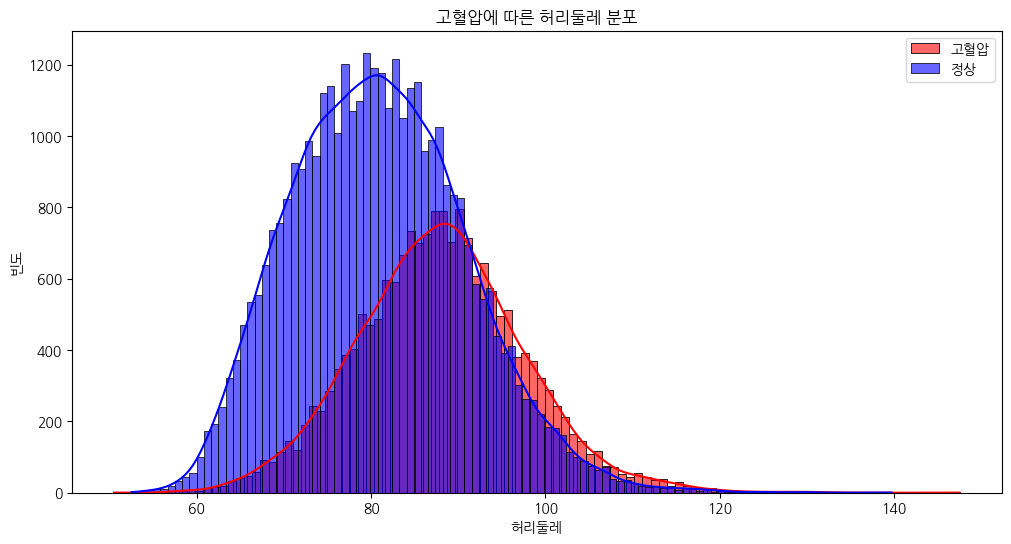

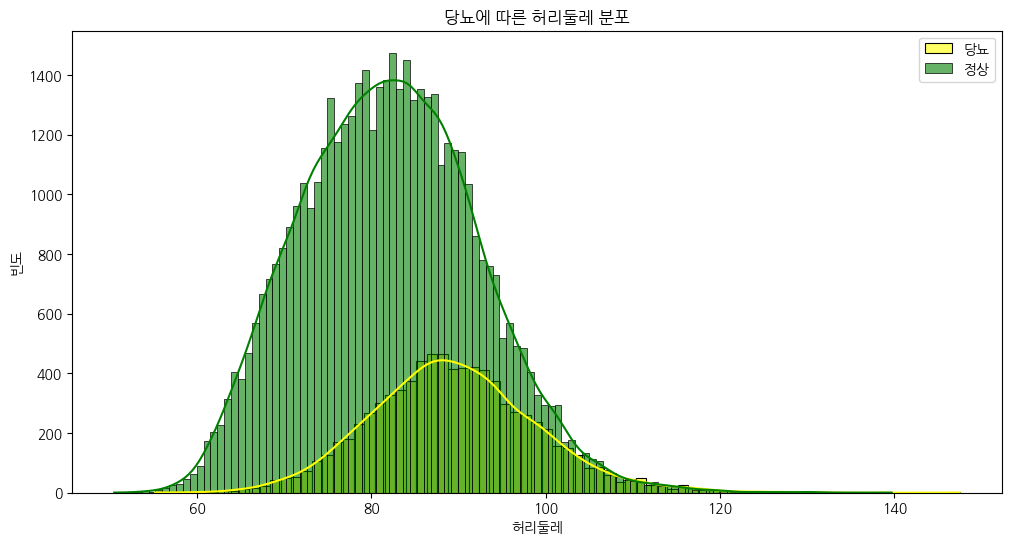

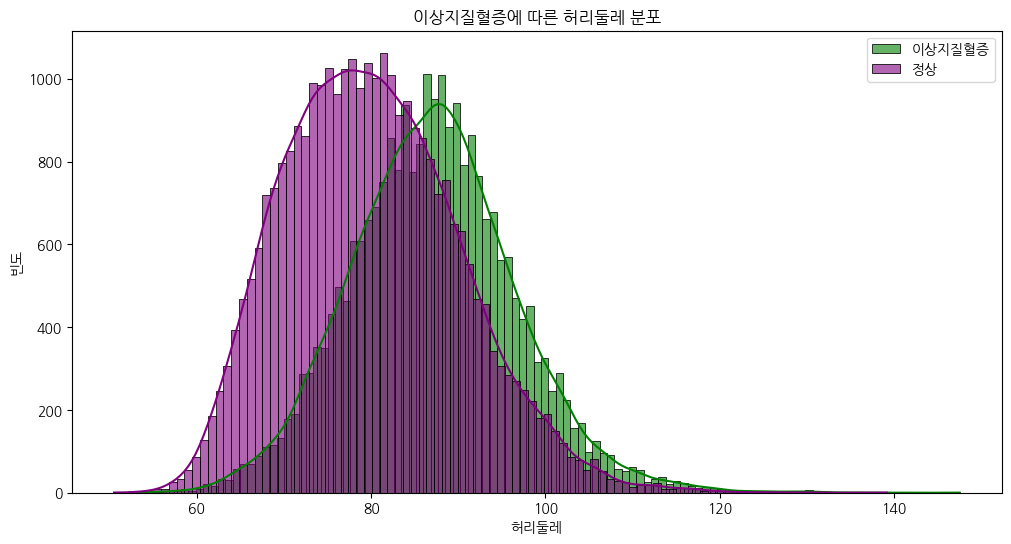

In [ ]:
# '고혈압', '당뇨', '이상지질혈증'에 대해 허리둘레 분포를 히스토그램으로 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['고혈압'] == 1], x='he_wc', kde=True, color='red', label='고혈압', alpha=0.6)
sns.histplot(data=df[df['고혈압'] == 0], x='he_wc', kde=True, color='blue', label='정상', alpha=0.6)
plt.title('고혈압에 따른 허리둘레 분포')
plt.xlabel('허리둘레')
plt.ylabel('빈도')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['당뇨'] == 1], x='he_wc', kde=True, color='yellow', label='당뇨', alpha=0.6)
sns.histplot(data=df[df['당뇨'] == 0], x='he_wc', kde=True, color='green', label='정상', alpha=0.6)
plt.title('당뇨에 따른 허리둘레 분포')
plt.xlabel('허리둘레')
plt.ylabel('빈도')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['이상지질혈증'] == 1], x='he_wc', kde=True, color='green', label='이상지질혈증', alpha=0.6)
sns.histplot(data=df[df['이상지질혈증'] == 0], x='he_wc', kde=True, color='purple', label='정상', alpha=0.6)
plt.title('이상지질혈증에 따른 허리둘레 분포')
plt.xlabel('허리둘레')
plt.ylabel('빈도')
plt.legend()
plt.show()

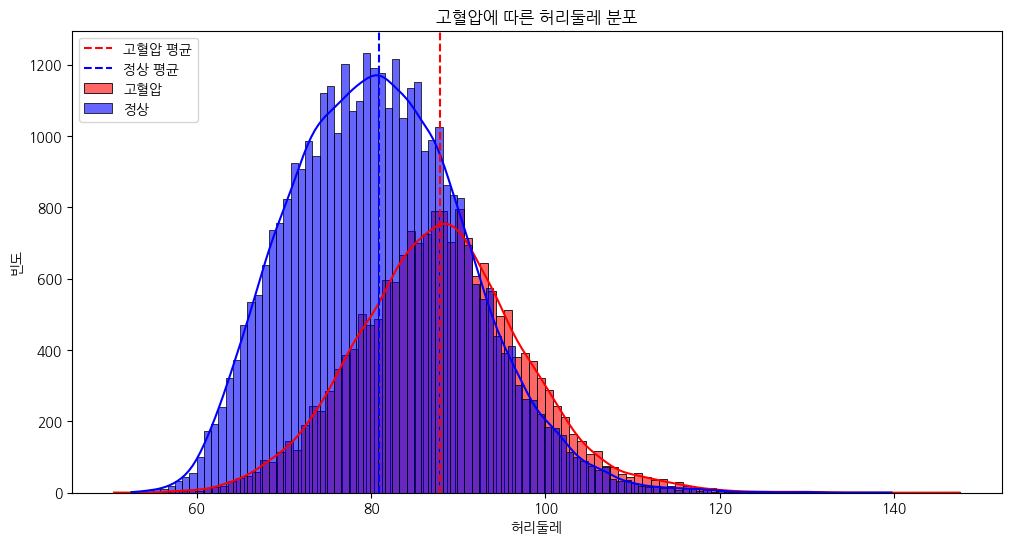

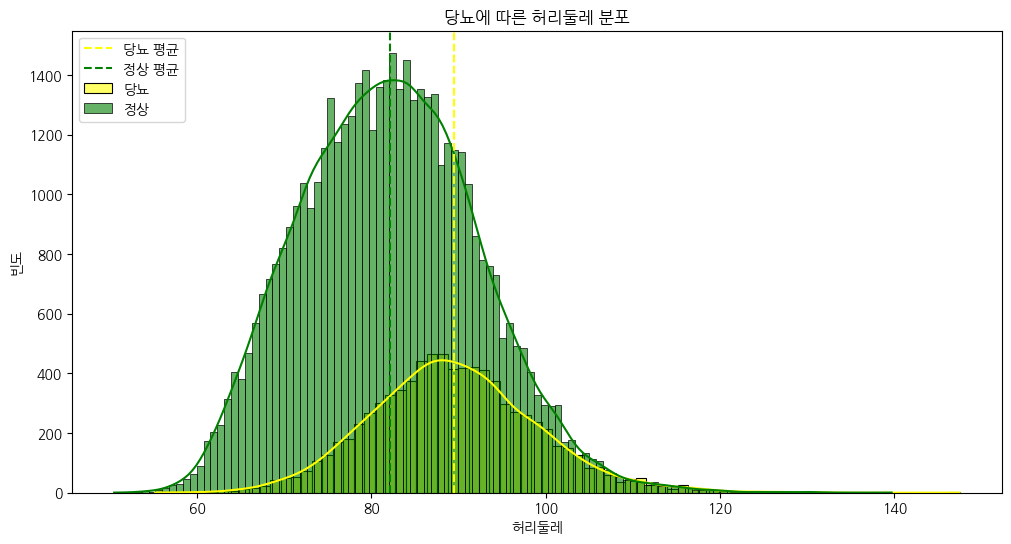

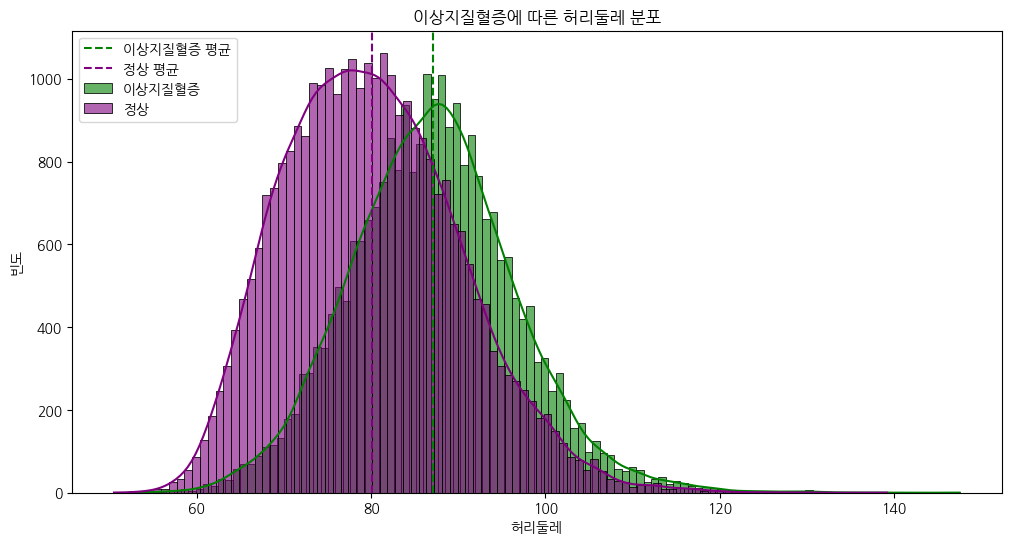

In [ ]:
# 고혈압에 따른 허리둘레 분포
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['고혈압'] == 1], x='he_wc', kde=True, color='red', label='고혈압', alpha=0.6)
sns.histplot(data=df[df['고혈압'] == 0], x='he_wc', kde=True, color='blue', label='정상', alpha=0.6)

# 고혈압 평균 추가
hypertension_mean = df.groupby('고혈압')['he_wc'].mean()
plt.axvline(hypertension_mean[1], color='red', linestyle='--', label='고혈압 평균')
plt.axvline(hypertension_mean[0], color='blue', linestyle='--', label='정상 평균')

plt.title('고혈압에 따른 허리둘레 분포')
plt.xlabel('허리둘레')
plt.ylabel('빈도')
plt.legend(loc='upper left')
plt.show()

# 당뇨에 따른 허리둘레 분포
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['당뇨'] == 1], x='he_wc', kde=True, color='yellow', label='당뇨', alpha=0.6)
sns.histplot(data=df[df['당뇨'] == 0], x='he_wc', kde=True, color='green', label='정상', alpha=0.6)

# 당뇨 평균 추가
diabetes_mean = df.groupby('당뇨')['he_wc'].mean()
plt.axvline(diabetes_mean[1], color='yellow', linestyle='--', label='당뇨 평균')
plt.axvline(diabetes_mean[0], color='green', linestyle='--', label='정상 평균')

plt.title('당뇨에 따른 허리둘레 분포')
plt.xlabel('허리둘레')
plt.ylabel('빈도')
plt.legend(loc='upper left')
plt.show()

# 이상지질혈증에 따른 허리둘레 분포
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['이상지질혈증'] == 1], x='he_wc', kde=True, color='green', label='이상지질혈증', alpha=0.6)
sns.histplot(data=df[df['이상지질혈증'] == 0], x='he_wc', kde=True, color='purple', label='정상', alpha=0.6)

# 이상지질혈증 평균 추가
dyslipidemia_mean = df.groupby('이상지질혈증')['he_wc'].mean()
plt.axvline(dyslipidemia_mean[1], color='green', linestyle='--', label='이상지질혈증 평균')
plt.axvline(dyslipidemia_mean[0], color='purple', linestyle='--', label='정상 평균')

plt.title('이상지질혈증에 따른 허리둘레 분포')
plt.xlabel('허리둘레')
plt.ylabel('빈도')
plt.legend(loc='upper left')
plt.show()

## 나이별 ~

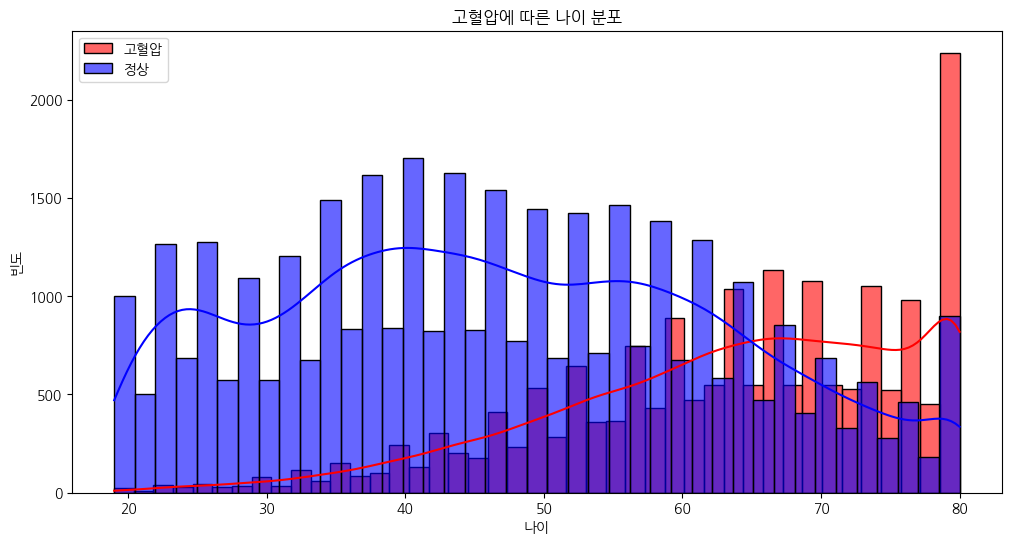

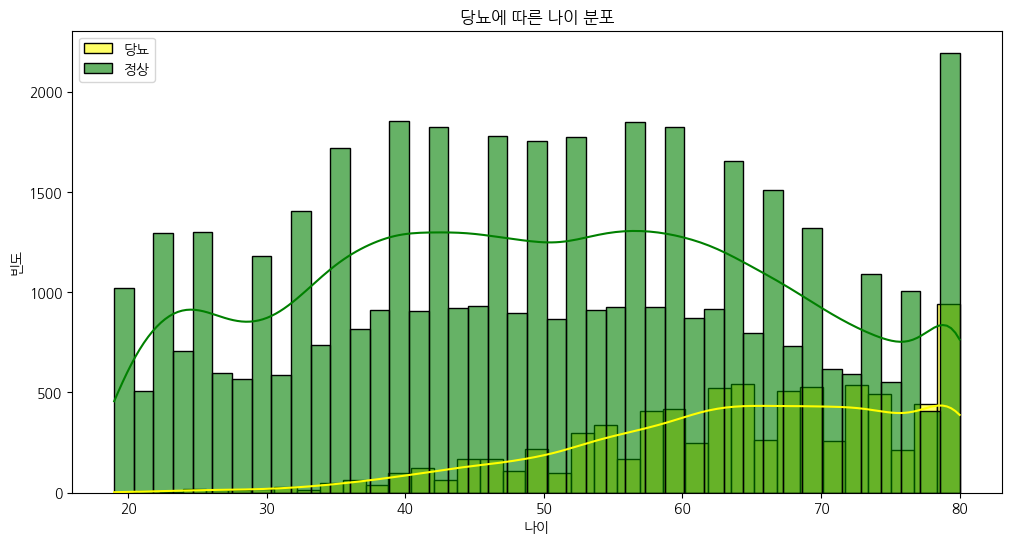

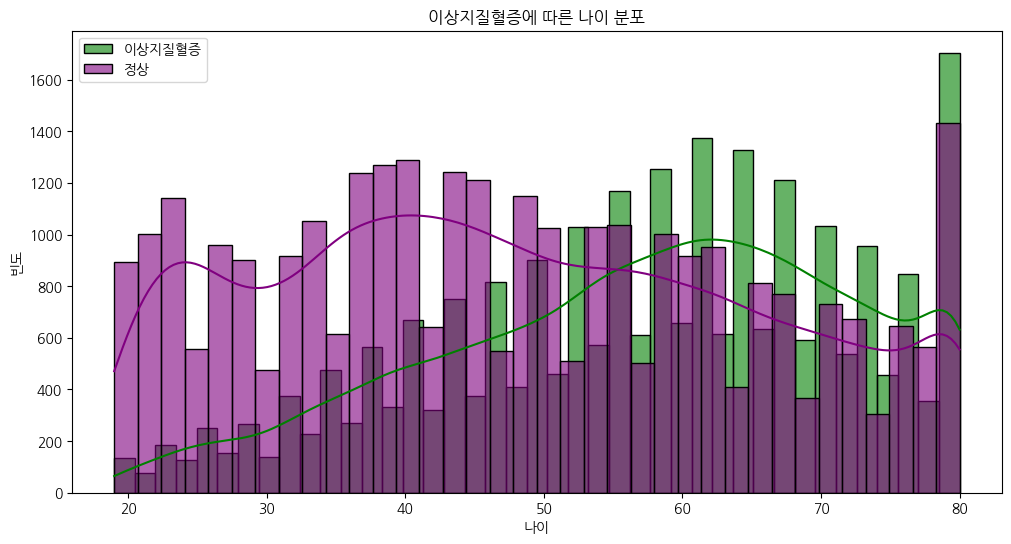

In [ ]:
# '고혈압', '당뇨', '이상지질혈증'에 대해 나이 분포를 히스토그램으로 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['고혈압'] == 1], x='age', kde=True, color='red', label='고혈압', alpha=0.6)
sns.histplot(data=df[df['고혈압'] == 0], x='age', kde=True, color='blue', label='정상', alpha=0.6)
plt.title('고혈압에 따른 나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['당뇨'] == 1], x='age', kde=True, color='yellow', label='당뇨', alpha=0.6)
sns.histplot(data=df[df['당뇨'] == 0], x='age', kde=True, color='green', label='정상', alpha=0.6)
plt.title('당뇨에 따른 나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['이상지질혈증'] == 1], x='age', kde=True, color='green', label='이상지질혈증', alpha=0.6)
sns.histplot(data=df[df['이상지질혈증'] == 0], x='age', kde=True, color='purple', label='정상', alpha=0.6)
plt.title('이상지질혈증에 따른 나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.legend()
plt.show()

# 상관계수

In [ ]:
# 상관계수 계산 (피어슨 상관계수)
correlation_matrix = train.corr()

# 당뇨 칼럼과 다른 칼럼들 간의 상관관계 추출
target_corr = correlation_matrix['고혈압'].drop(['고혈압', '고혈압_정도', '당뇨_정도', '이상지질혈증_정도'])
\
# 절대값 기준으로 상위 10개 상관관계 추출
top_10_corr = target_corr.abs().sort_values(ascending=False).head(10)

# 결과 테이블을 생성하기 위한 리스트
result_data = []

# 상관관계 부호와 함께 상위 10개 칼럼 추가
for column in top_10_corr.index:
    corr_value = target_corr[column]
    result_data.append([column, corr_value])

# DataFrame으로 변환하여 출력
result_df = pd.DataFrame(result_data, columns=['Feature', 'Correlation'])
result_df

,Feature,Correlation
0,나이,0.466972
1,교육수준_재분류,-0.347377
2,허리둘레,0.314374
3,당뇨,0.260950
4,영양표시이용여부,0.258985
5,이상지질혈증,0.253615
6,부_교육수준,0.246573
7,모_교육수준,0.245129
8,형제자매_고혈압,0.241132
9,비만,0.225042


In [ ]:
# 당뇨 칼럼과 다른 칼럼들 간의 상관관계 추출
target_corr = correlation_matrix['당뇨'].drop(['당뇨', '고혈압_정도', '당뇨_정도', '이상지질혈증_정도'])

# 절대값 기준으로 상위 10개 상관관계 추출
top_10_corr = target_corr.abs().sort_values(ascending=False).head(10)

# 결과 테이블을 생성하기 위한 리스트
result_data = []

# 상관관계 부호와 함께 상위 10개 칼럼 추가
for column in top_10_corr.index:
    corr_value = target_corr[column]
    result_data.append([column, corr_value])

# DataFrame으로 변환하여 출력
result_df = pd.DataFrame(result_data, columns=['Feature', 'Correlation'])
result_df

,Feature,Correlation
0,나이,0.293055
1,고혈압,0.260950
2,허리둘레,0.250795
3,이상지질혈증,0.223448
4,교육수준_재분류,-0.222090
5,형제자매_당뇨,0.205289
6,영양표시이용여부,0.172368
7,모_교육수준,0.162426
8,부_교육수준,0.158310
9,비만,0.155043


In [ ]:
# 당뇨 칼럼과 다른 칼럼들 간의 상관관계 추출
target_corr = correlation_matrix['이상지질혈증'].drop(['이상지질혈증', '고혈압_정도', '당뇨_정도', '이상지질혈증_정도'])

# 절대값 기준으로 상위 10개 상관관계 추출
top_10_corr = target_corr.abs().sort_values(ascending=False).head(10)

# 결과 테이블을 생성하기 위한 리스트
result_data = []

# 상관관계 부호와 함께 상위 10개 칼럼 추가
for column in top_10_corr.index:
    corr_value = target_corr[column]
    result_data.append([column, corr_value])

# DataFrame으로 변환하여 출력
result_df = pd.DataFrame(result_data, columns=['Feature', 'Correlation'])
result_df

,Feature,Correlation
0,허리둘레,0.333060
1,나이,0.279131
2,고혈압,0.253615
3,비만,0.241405
4,당뇨,0.223448
5,월경여부,0.211670
6,몸무게,0.187565
7,교육수준_재분류,-0.178901
8,결혼상태,-0.171568
9,결혼여부,-0.171355


In [ ]:
# from graphviz import Digraph

# # Create a new directed graph
# dot = Digraph(comment='MultiOutputClassifier')

# # Add nodes for Input and classifiers
# dot.node('A', 'Input Data')
# dot.node('B1', 'Classifier 1')
# dot.node('B2', 'Classifier 2')
# dot.node('B3', 'Classifier 3')

# # Add nodes for Predictions (Outputs)
# dot.node('P1', '고혈압')
# dot.node('P2', '당뇨')
# dot.node('P3', '이상지질혈증')

# # Add edges for the flow of data
# dot.edge('A', 'B1', label=None)
# dot.edge('A', 'B2', label=None)
# dot.edge('A', 'B3', label=None)

# dot.edge('B1', 'P1', label='고혈압 예측')
# dot.edge('B2', 'P2', label='당뇨 예측')
# dot.edge('B3', 'P3', label='이상지질혈증 예측')

# # Render the graph to a file (e.g., PNG)
# dot.render('multioutput_classifier', format='png', view=True)

In [ ]:
# # Create a new directed graph
# dot = Digraph(comment='ClassifierChain')

# # Add nodes
# dot.node('A', 'Input Data')
# dot.node('B1', 'Classifier 1')
# dot.node('B2', 'Classifier 2')
# dot.node('B3', 'Classifier 3')
# dot.node('P1', 'Prediction 1')
# dot.node('P2', 'Prediction 2')
# dot.node('P3', 'Prediction 3')

# # Add edges to show flow
# dot.edge('A', 'B1', label='Initial Input')
# dot.edge('B1', 'P1', label='Prediction 1')
# dot.edge('B1', 'B2', label='Prediction 1')
# dot.edge('B2', 'P2', label='Prediction 2')
# dot.edge('B2', 'B3', label='Prediction 1 + 2')
# dot.edge('B3', 'P3', label='Prediction 3')

# # Render the graph
# dot.render('classifier_chain', format='png', view=True)

In [ ]:
# PPT 데이터 소개 페이지 구성에 대해 제안드리겠습니다. 전체적으로 시각적으로 깔끔하고, 중요한 정보를 강조하면서도 내용을 잘 전달할 수 있는 레이아웃을 추천드립니다.

# ### 1. **슬라이드 제목**
# - **제목:** 데이터셋 주요 칼럼 소개

# ### 2. **구성 방안**

# #### A. **슬라이드 상단** (간단한 데이터셋 소개)
# - **텍스트 박스 (간략한 설명):**
#   - “본 데이터셋은 고혈압, 당뇨, 이상지질혈증을 예측하기 위한 다양한 개인 특성 및 생활 습관 데이터를 포함하고 있습니다. 주요 변수는 개인의 신체 특성, 가족력, 거주지, 흡연 및 음주 습관 등으로 구성되어 있습니다.”

# #### B. **슬라이드 본문** (주요 칼럼별로 그룹화)
# - **섹션 1: 개인 특성**
#   - **하위 항목들 나열**:
#     - 성별, 나이, 키, 몸무게, 허리둘레, 체질량지수, 비만여부
#   - **슬라이드 하단에 강조 표시**:
#     - "개인 건강 지표 및 신체 특성"

# - **섹션 2: 개인 특성 (여성)**
#   - **하위 항목들 나열**:
#     - 월경여부, 초경연령, 임신경험여부, 임신횟수, 출산경험, 첫출산연령 등
#   - **슬라이드 하단에 강조 표시**:
#     - "여성 건강 관련 변수"

# - **섹션 3: 가족력**
#   - **하위 항목들 나열**:
#     - 고혈압, 고지혈증, 허혈성심장질환, 뇌졸중, 당뇨 등 가족력 정보
#   - **슬라이드 하단에 강조 표시**:
#     - "가족 건강력 정보"

# - **섹션 4: 거주지**
#   - **하위 항목들 나열**:
#     - 지역(시/도)
#   - **슬라이드 하단에 강조 표시**:
#     - "거주지 지역 정보"

# - **섹션 5: 흡연 및 음주**
#   - **하위 항목들 나열**:
#     - 음주경험, 음주시작연령, 1년간음주빈도, 흡연경험, 흡연시작연령 등
#   - **슬라이드 하단에 강조 표시**:
#     - "생활 습관: 흡연 및 음주"

# #### C. **슬라이드 하단** (시각적 요소 추가)
# - **아이콘이나 이미지 사용:**
#   - 각 섹션을 대표하는 아이콘을 사용하여 시각적 효과를 강화합니다. 예를 들어, 흡연은 담배 아이콘, 가족력은 가족 아이콘 등을 사용할 수 있습니다.

# #### D. **슬라이드 디자인**
# - **폰트와 색상**:
#   - 주요 항목들은 **볼드체**로 강조하고, 하위 항목은 일반체로 나열합니다.
#   - 배경은 밝고 깔끔한 색상으로 설정하여 가독성을 높입니다. (예: 밝은 파스텔톤 배경)
#   - 각 섹션은 **가로 또는 세로로 구분**하여 시각적으로 분리합니다.

# ### 3. **추가 팁**
# - **슬라이드 전환 효과**:
#   - 각 섹션별로 슬라이드 전환 효과를 넣어 내용을 순차적으로 나타낼 수 있도록 구성하면 더 이해하기 쉬울 수 있습니다.

# 이렇게 구성된 PPT 페이지는 데이터셋의 주요 정보를 잘 전달할 수 있으며, 청중이 쉽게 이해할 수 있도록 돕는 역할을 합니다.